<a href="https://colab.research.google.com/github/ij451r/DataScienceJourney/blob/main/LinearRegression-HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
insurance = pd.read_csv('/content/new_insurance_data.csv')

In [ ]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance.ndim

2

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
insurance.describe().round()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0,1335.0,1333.0,1324.0,1332.0,1335.0,1334.0,1336.0,1.332000e+03,1338.0
mean,39.0,31.0,1.0,33361.0,15.0,910005.0,15841792.0,1.0,3.696849e+08,13270.0
std,14.0,6.0,1.0,15617.0,7.0,91886.0,26693048.0,1.0,5.668843e+08,12110.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,27.0,26.0,0.0,20769.0,9.0,847200.0,4077633.0,1.0,7.701932e+07,4740.0
50%,39.0,30.0,1.0,33700.0,15.0,914300.0,7490337.0,1.0,1.419361e+08,9382.0
75%,51.0,35.0,2.0,45052.0,20.0,971684.0,10840822.0,1.0,3.243499e+08,16640.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


In [ ]:
# distribution of data

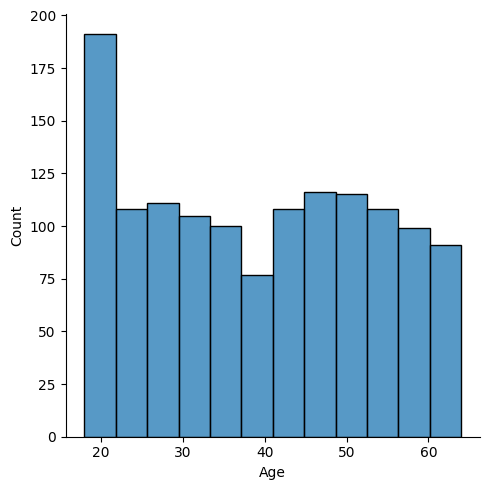

In [ ]:
sns.displot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-40-203fc769588c>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['children'])


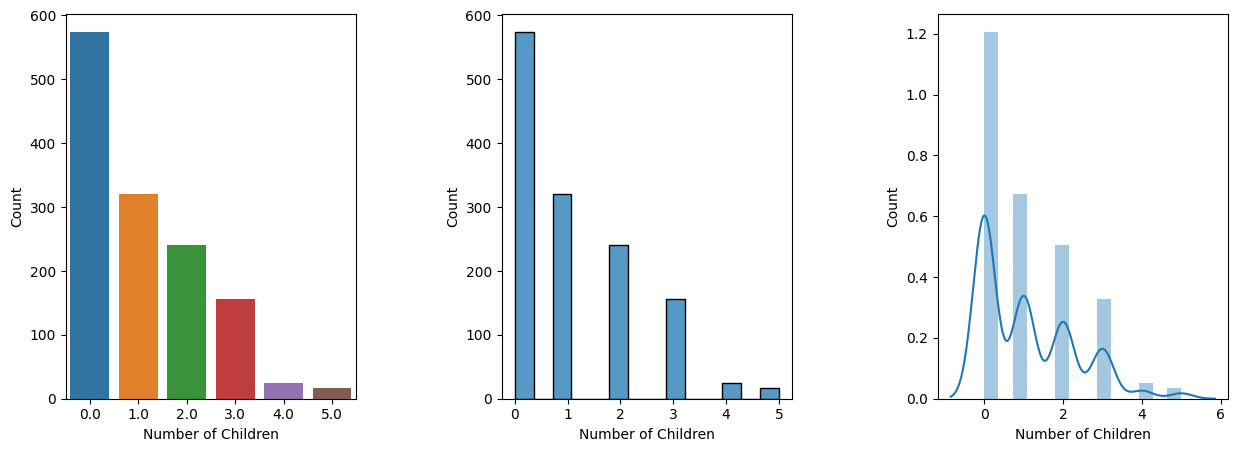

In [ ]:
#distribution of children column
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

<ipython-input-41-d2332f5c1e00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= insurance['Claim_Amount'])


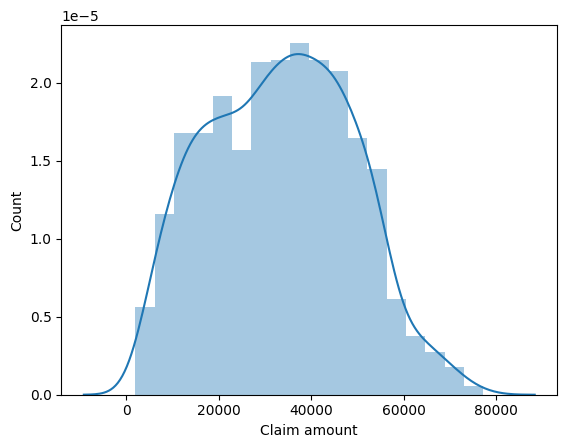

In [ ]:
#distribution of claim amount
sns.distplot(x= insurance['Claim_Amount'])
plt.xlabel('Claim amount')
plt.ylabel('Count')
plt.show()

<ipython-input-42-dc68223764df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= insurance['past_consultations'])


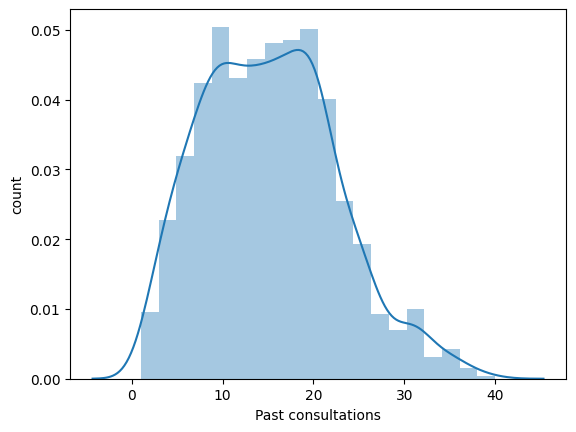

In [ ]:
sns.distplot(x= insurance['past_consultations'])
plt.xlabel('Past consultations')
plt.ylabel('count')
plt.show()

In [ ]:
ins = insurance.copy()
ins['num_of_steps'] = ins['num_of_steps'].div(10000).round(2)

<ipython-input-44-4298816c6b20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ins['num_of_steps'])


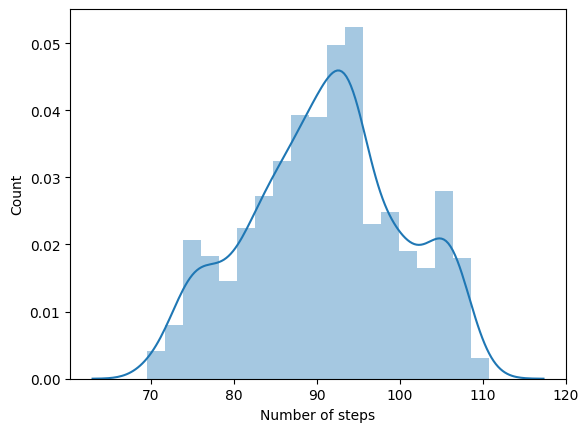

In [ ]:
sns.distplot(x=ins['num_of_steps'])
plt.xlabel('Number of steps')
plt.ylabel('Count')
plt.show()

In [ ]:
ins['Hospital_expenditure'] = ins['Hospital_expenditure'].div(10000).round(2)

<ipython-input-46-9853f6cda3fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ins['Hospital_expenditure'])


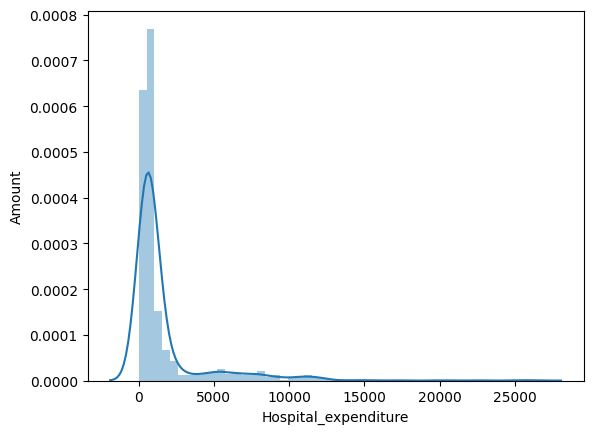

In [ ]:
sns.distplot(x=ins['Hospital_expenditure'])
plt.xlabel('Hospital_expenditure')
plt.ylabel('Amount')
plt.show()

<ipython-input-47-9700557a9828>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =insurance['NUmber_of_past_hospitalizations'])


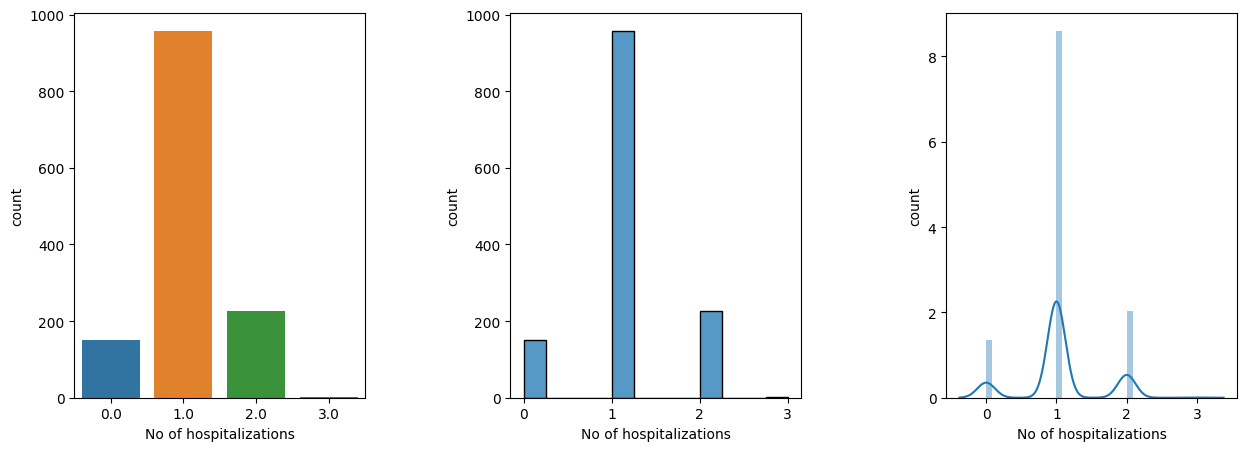

In [ ]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x =insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('No of hospitalizations')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x =insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('No of hospitalizations')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x =insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('No of hospitalizations')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
insurance['smoker'] = le.fit_transform(insurance['smoker']) # categorical to numerical
insurance['smoker'] = insurance['smoker'].astype(int)

<ipython-input-50-f4ecb26f88a3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =insurance['smoker'])


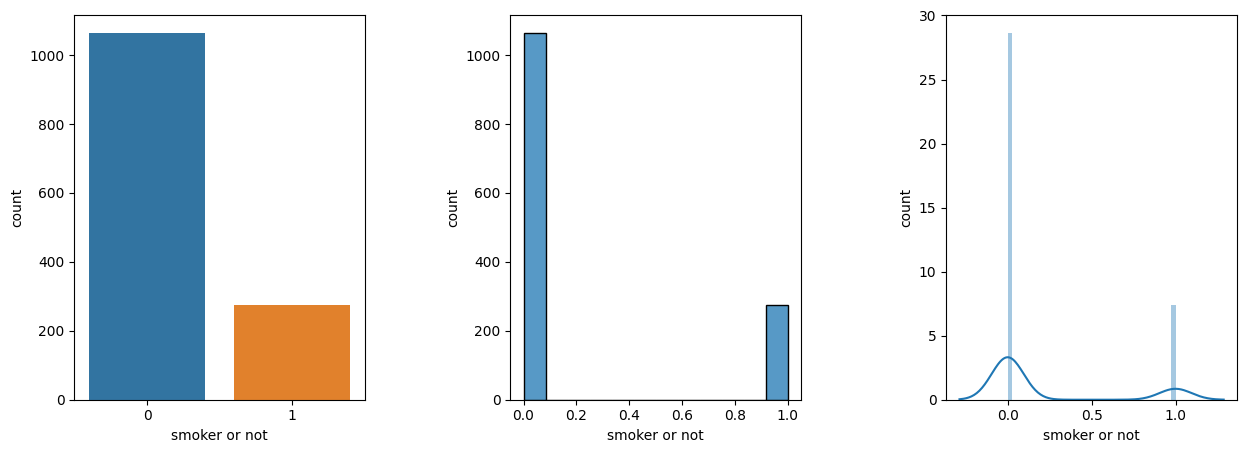

In [ ]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x =insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x =insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x =insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

<ipython-input-51-1c3898c930c4>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =insurance['sex'])


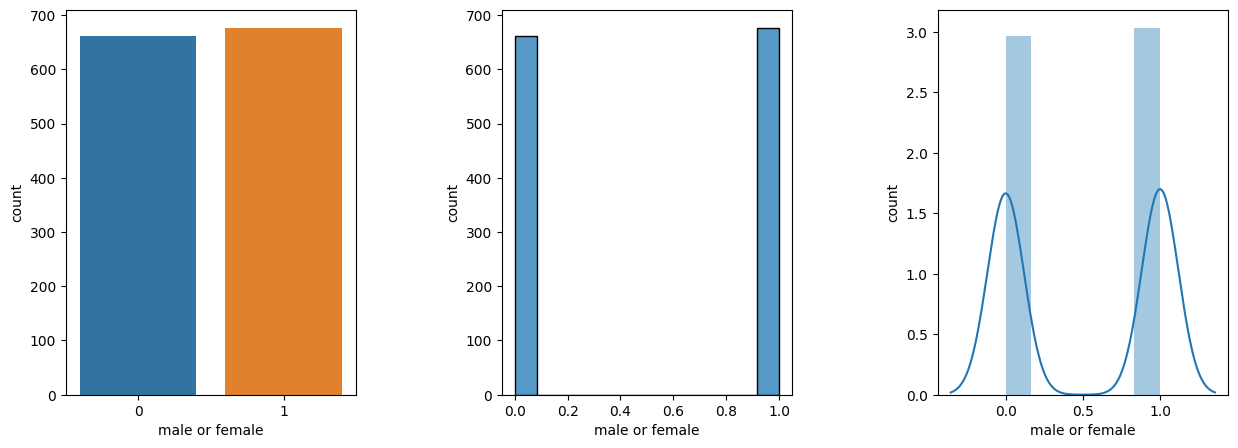

female


In [ ]:
insurance['sex'] = le.fit_transform(insurance['sex']) # categorical to numerical
insurance['sex'] = insurance['sex'].astype(int)
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x =insurance['sex'])
plt.xlabel('male or female')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x =insurance['sex'])
plt.xlabel('male or female')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x =insurance['sex'])
plt.xlabel('male or female')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

category_0 = le.classes_[0]
print(category_0)

<ipython-input-52-12aa18b9f41b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ins_dum['Anual_Salary'], bins=10)


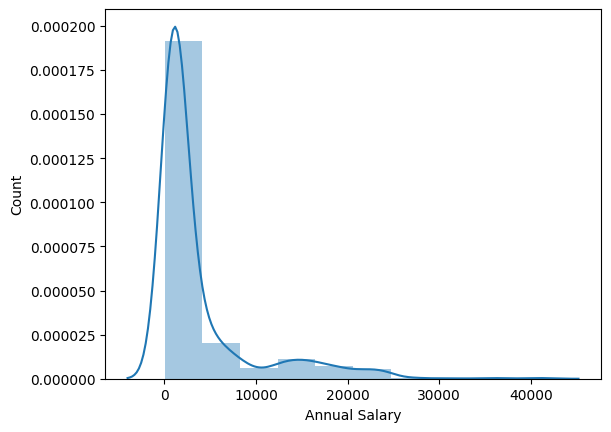

In [ ]:
ins_dum = insurance.copy()
ins_dum['Anual_Salary'] = ins_dum['Anual_Salary'].div(100000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'], bins=10)
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

<ipython-input-53-590aa694a157>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['charges'])


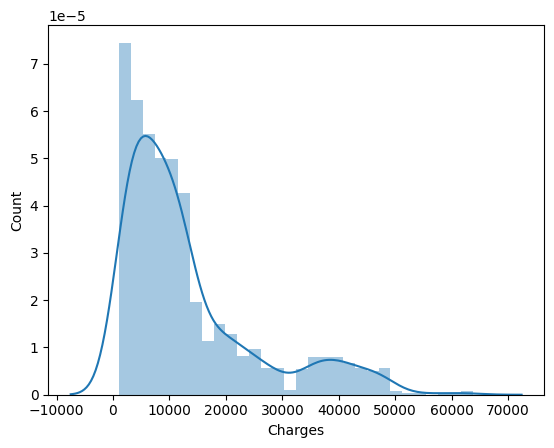

In [ ]:
#distribution of charges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

<ipython-input-55-5fd6558de6f6>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['region'])


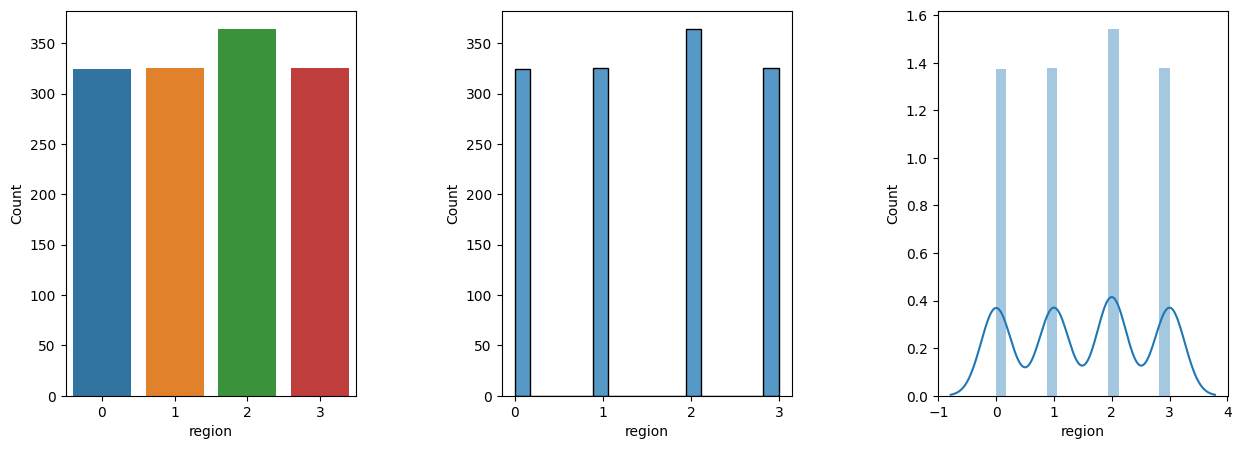

In [ ]:
#distribution of reagions column
insurance['region'] = le.fit_transform(insurance['region'])
insurance['region'] = insurance['region'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [ ]:
# outlier detection

<Axes: >

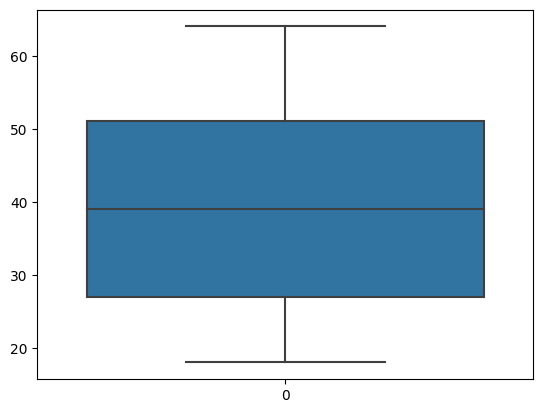

In [ ]:
sns.boxplot(insurance['age'])

<Axes: >

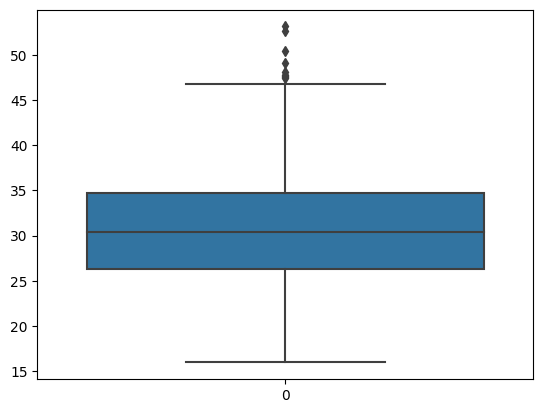

In [ ]:
sns.boxplot(insurance['bmi'])

<Axes: xlabel='children'>

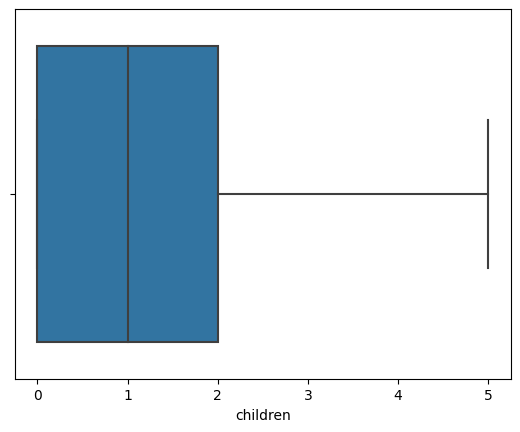

In [ ]:
sns.boxplot(x=insurance['children'])

<Axes: xlabel='Claim_Amount'>

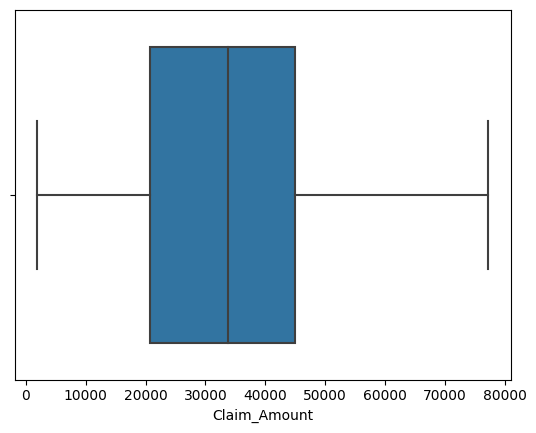

In [ ]:
sns.boxplot(x=insurance['Claim_Amount'])


<Axes: xlabel='past_consultations'>

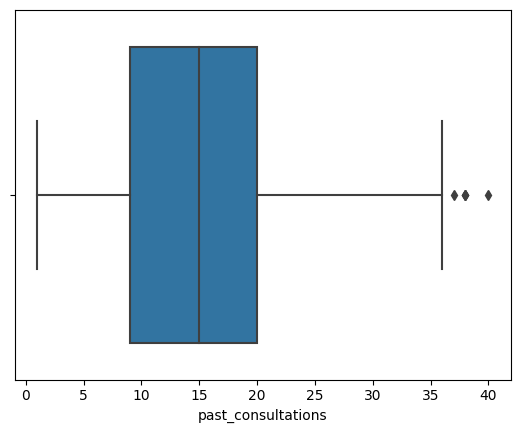

In [ ]:
sns.boxplot(x=insurance['past_consultations'])

<Axes: xlabel='num_of_steps'>

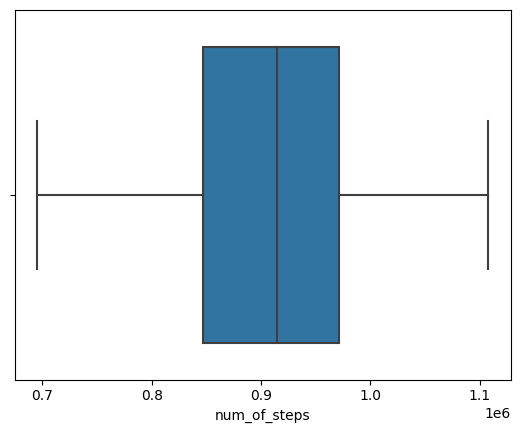

In [ ]:
sns.boxplot(x=insurance['num_of_steps'])

<Axes: xlabel='Hospital_expenditure'>

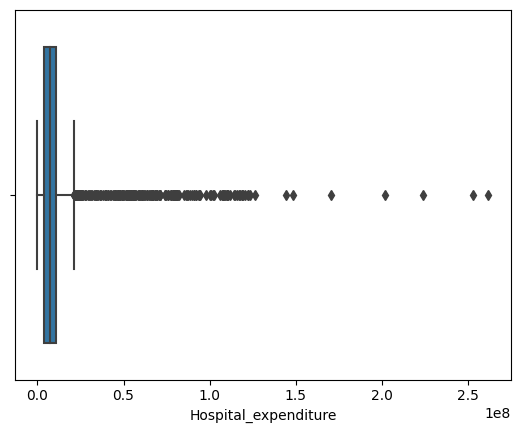

In [ ]:
sns.boxplot(x=insurance['Hospital_expenditure'])

<Axes: xlabel='Anual_Salary'>

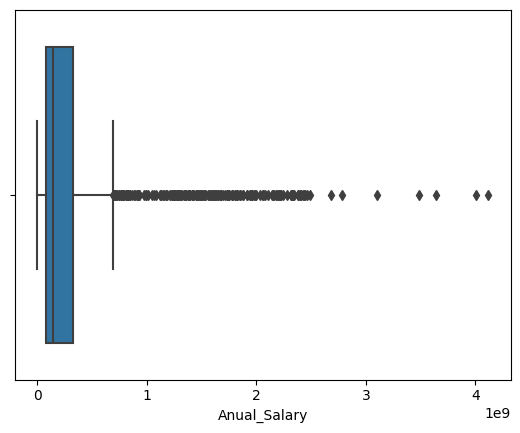

In [ ]:
sns.boxplot(x=insurance['Anual_Salary'])

<Axes: xlabel='region'>

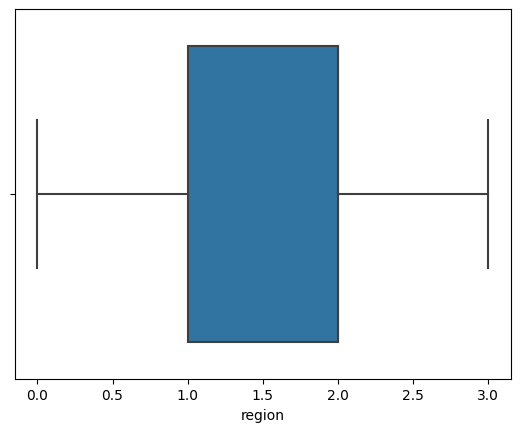

In [ ]:
sns.boxplot(x=insurance['region'])

<Axes: xlabel='charges'>

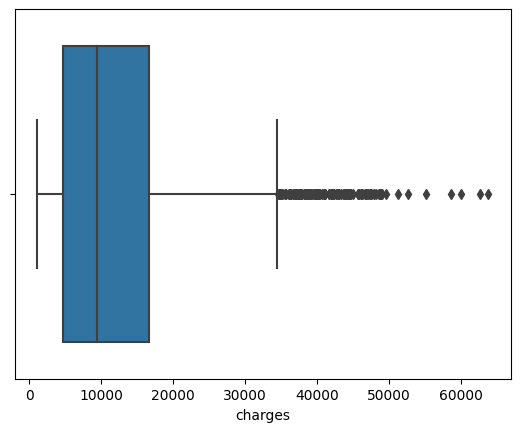

In [ ]:
sns.boxplot(x=insurance['charges'])

<Figure size 1000x500 with 0 Axes>

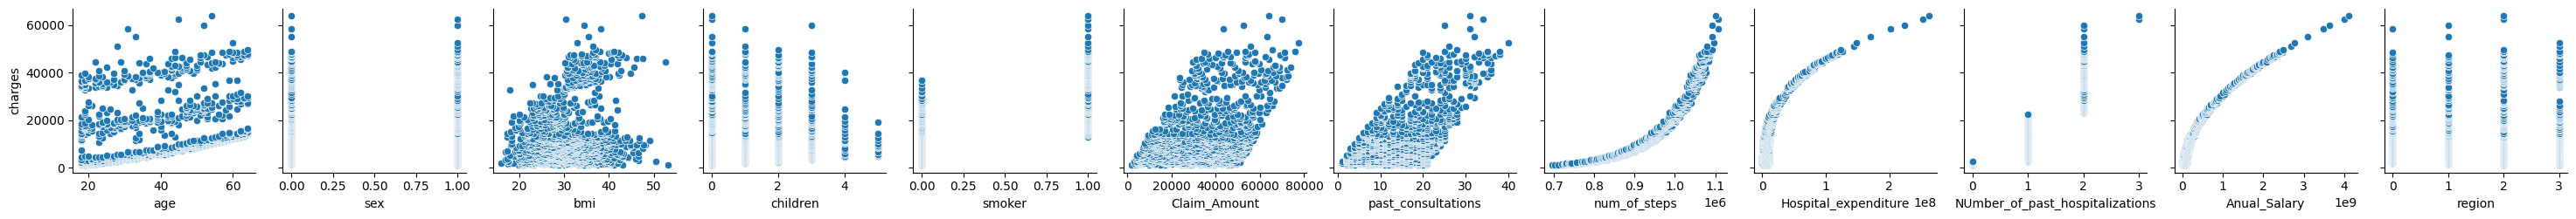

In [ ]:
# checking relationsip between independent and dependent columns
plt.figure(figsize=(10,5))
sns.pairplot(data= insurance, y_vars=['charges'], x_vars=['age',
                                                         'sex',
                                                         'bmi',
                                                         'children',
                                                         'smoker',
                                                         'Claim_Amount',
                                                         'past_consultations',
                                                         'num_of_steps',
                                                         'Hospital_expenditure',
                                                         'NUmber_of_past_hospitalizations',
                                                         'Anual_Salary',
                                                         'region'])

In [ ]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
insurance['age'] = insurance['age'].fillna(insurance['age'].mean())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

In [ ]:
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [ ]:
#Feature selection for data modelling

In [ ]:
correlation = insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019105,0.112161,0.041616,-0.028868,0.122828,0.168311,0.512985,0.137146,0.359434,0.163392,0.004659,0.293604
sex,-0.019105,1.000000,0.045170,0.018533,0.076185,-0.003884,0.050403,0.010342,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112161,0.045170,1.000000,0.007755,0.003610,0.093313,0.130667,0.135903,0.256892,0.137043,0.241505,0.158261,0.198691
children,0.041616,0.018533,0.007755,1.000000,0.009608,0.041502,0.054832,0.163487,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028868,0.076185,0.003610,0.009608,1.000000,0.334406,0.502836,0.665711,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122828,-0.003884,0.093313,0.041502,0.334406,1.000000,0.271482,0.398342,0.369921,0.379889,0.403974,0.009028,0.435635
past_consultations,0.168311,0.050403,0.130667,0.054832,0.502836,0.271482,1.000000,0.559682,0.542172,0.500131,0.589304,-0.001866,0.627592
num_of_steps,0.512985,0.010342,0.135903,0.163487,0.665711,0.398342,0.559682,1.000000,0.624835,0.845128,0.733685,-0.041920,0.889848
Hospital_expenditure,0.137146,0.069940,0.256892,0.025315,0.662698,0.369921,0.542172,0.624835,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359434,0.000214,0.137043,0.185546,0.588682,0.379889,0.500131,0.845128,0.651827,1.000000,0.735802,-0.031450,0.820682


<Axes: >

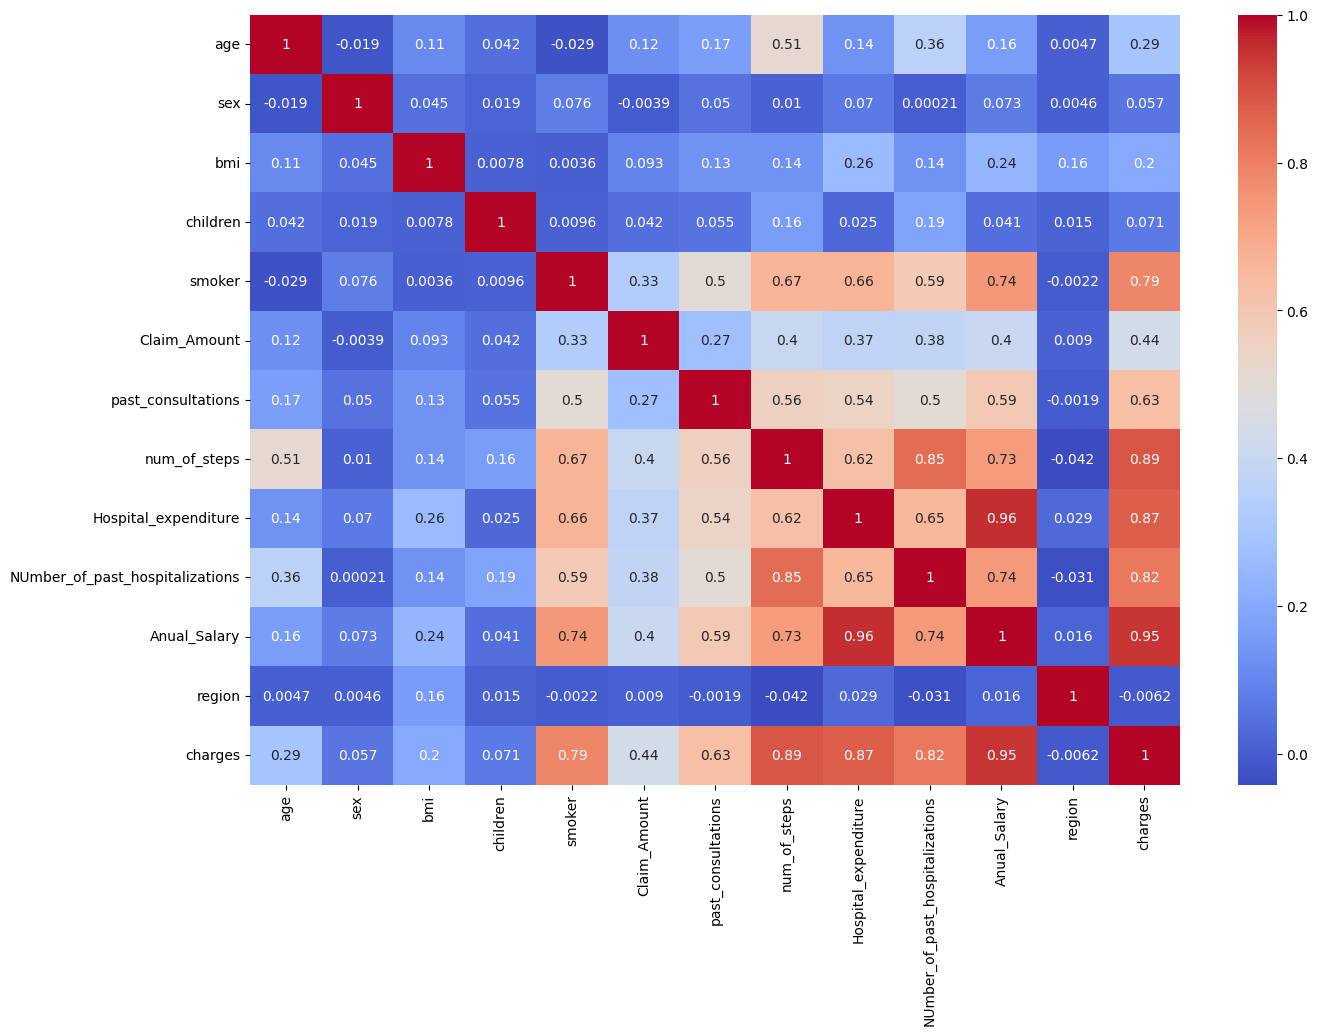

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, cmap='coolwarm', annot=True)

1.here the correlation is non considerable with sex,children,  and region column

In [ ]:
#creating models

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting for model 1
X = insurance.drop(['charges', 'age', 'sex' ,'bmi', 'children','region'], axis= 1)
y = insurance.iloc[:,-1]

In [ ]:
# splitting for model2
X2 = insurance.drop(['charges'], axis= 1)

In [ ]:
# splitting for model3
X3 = insurance.drop(['charges', 'age', 'sex' ,'bmi', 'children'], axis= 1)

In [ ]:
#splitting for model 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#splitting for model 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=42)


In [ ]:
#splitting for model 3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y,test_size=0.3, random_state=42)


In [ ]:
#feature scaling using the standard scaler - when we normalize our data mean =0  std deviation =0
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
#model1
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
#model2
X_train2 = sc.fit_transform(X_train2)
X_test2= sc.transform(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
#model3
X_train3 = sc.fit_transform(X_train3)
X_test3= sc.transform(X_test3)

In [ ]:
#model 1
y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))
#model 2
y_train_arr2 = y_train2.values
y_train2 = y_train_arr2.reshape((-1,1))
#model 3
y_train_arr3 = y_train3.values
y_train3 = y_train_arr3.reshape((-1,1))